# Simple Prophet Examples

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:

import numpy as np
import pandas as pd
import os 
import fbprophet

# help ipython find our path
directory = os.path.dirname(os.path.dirname(os.path.abspath('')))
os.chdir(directory)

import forecastframe as ff


Importing plotly failed. Interactive plots will not work.


## Non-Hierarchical Example

In [3]:
prophet_data = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv")
fframe = ff.ForecastFrame(data=prophet_data, target="y", datetime_column="ds")

In [4]:
fframe.predict(model="prophet", future_periods=10, weekly_seasonality=True, daily_seasonality=True)
fframe.predictions


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,floor,t,trend,predicted_y_lower,predicted_y_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,predicted_y
ds,,,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,0,0.000000,16.250680,22.416671,33.702744,16.250680,16.250680,11.557169,11.557169,11.557169,11.584714,11.584714,11.584714,-0.027545,-0.027545,-0.027545,0.0,0.0,0.0,27.807849
2017-05-01 00:05:00,0,0.000053,16.253167,21.573931,32.970917,16.253167,16.253167,11.114570,11.114570,11.114570,11.144808,11.144808,11.144808,-0.030238,-0.030238,-0.030238,0.0,0.0,0.0,27.367737
2017-05-01 00:10:00,0,0.000107,16.255653,21.274888,32.942795,16.255653,16.255653,10.662177,10.662177,10.662177,10.695127,10.695127,10.695127,-0.032950,-0.032950,-0.032950,0.0,0.0,0.0,26.917831
2017-05-01 00:15:00,0,0.000160,16.258140,21.042853,32.227907,16.258140,16.258140,10.200631,10.200631,10.200631,10.236310,10.236310,10.236310,-0.035679,-0.035679,-0.035679,0.0,0.0,0.0,26.458772
2017-05-01 00:20:00,0,0.000214,16.260627,20.163758,31.296482,16.260627,16.260627,9.730617,9.730617,9.730617,9.769043,9.769043,9.769043,-0.038425,-0.038425,-0.038425,0.0,0.0,0.0,25.991244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-11 00:00:00,0,1.092308,21.681163,12.694122,53.392463,1.565703,42.916186,11.218239,11.218239,11.218239,11.584714,11.584714,11.584714,-0.366475,-0.366475,-0.366475,0.0,0.0,0.0,32.899402
2017-07-12 00:00:00,0,1.107692,21.391026,7.851966,60.168050,-4.881888,47.837358,12.391866,12.391866,12.391866,11.584714,11.584714,11.584714,0.807153,0.807153,0.807153,0.0,0.0,0.0,33.782892
2017-07-13 00:00:00,0,1.123077,21.100888,-0.606690,65.491605,-11.606101,53.869464,11.569959,11.569959,11.569959,11.584714,11.584714,11.584714,-0.014755,-0.014755,-0.014755,0.0,0.0,0.0,32.670847


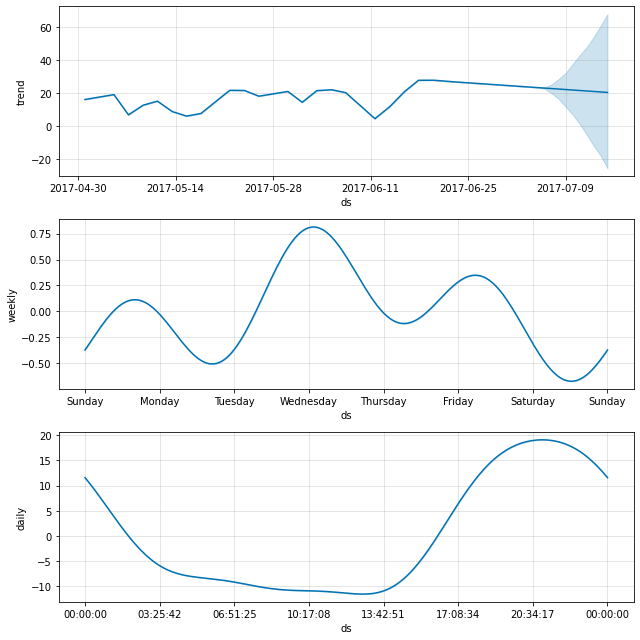

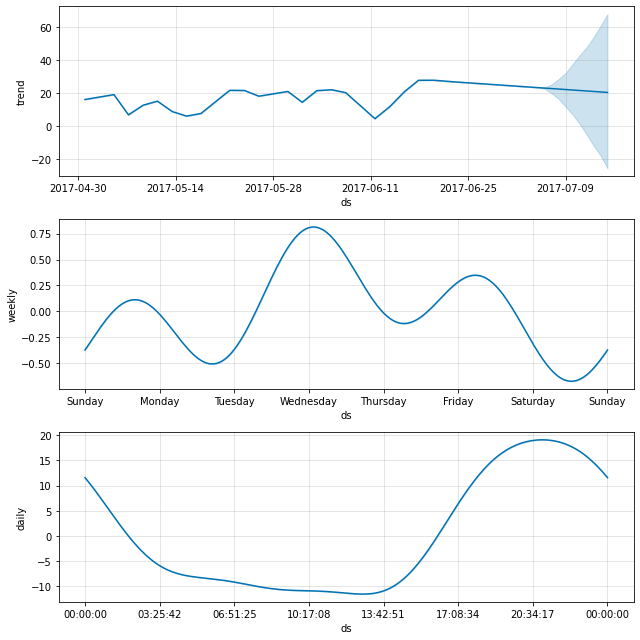

In [5]:
fframe.plot_components()

In [6]:
fframe.get_predictions()

,trend,predicted_y,predicted_y_upper,predicted_y_lower
ds,,,,
2017-05-01 00:00:00,16.250680,27.807849,33.702744,22.416671
2017-05-01 00:05:00,16.253167,27.367737,32.970917,21.573931
2017-05-01 00:10:00,16.255653,26.917831,32.942795,21.274888
2017-05-01 00:15:00,16.258140,26.458772,32.227907,21.042853
2017-05-01 00:20:00,16.260627,25.991244,31.296482,20.163758
...,...,...,...,...
2017-07-11 00:00:00,21.681163,32.899402,53.392463,12.694122
2017-07-12 00:00:00,21.391026,33.782892,60.168050,7.851966
2017-07-13 00:00:00,21.100888,32.670847,65.491605,-0.606690


In [7]:
fframe.get_errors()

,Actuals,Predictions,Absolute Percent Error,Absolute Error,Squared Error
count,18709.000000,18709.000000,18679.000000,18709.000000,1.870900e+04
mean,18.449409,18.449373,0.468867,3.154291,2.001421e+01
std,13.888552,13.012872,1.666729,3.172569,4.903955e+01
min,-8.400000,-6.559851,0.000016,0.000378,1.428153e-07
25%,8.000000,8.910201,0.065385,1.055417,1.113904e+00
50%,13.800000,16.178784,0.129155,2.251714,5.070216e+00
75%,27.900000,28.440161,0.343549,4.254577,1.810142e+01
max,53.200000,47.451807,69.646214,23.796608,5.662785e+02


In [8]:
fframe.cross_validate(folds=3)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# check that the latest round of predictions stored in the object were created using the params found in cross-validation
assert fframe.results["estimator"].seasonality_mode == fframe.cross_validations[-1]["best_params"]["seasonality_mode"]

In [10]:
fframe.get_cross_validation_errors()

[{'In-Sample':            Actuals  Predictions  Absolute Percent Error  Absolute Error  \
  count  4681.000000  4681.000000             4664.000000     4681.000000   
  mean     12.326768    12.274615                0.670084        3.125191   
  std      10.659573     9.957827                2.204711        2.280020   
  min      -4.300000    -1.489614                0.000074        0.000695   
  25%       5.100000     4.032158                0.115037        1.191336   
  50%       8.600000     9.708493                0.284004        2.827653   
  75%      17.900000    19.336209                0.620693        4.452857   
  max      43.099998    36.752666               75.739959       15.343415   
  
         Squared Error  
  count   4.681000e+03  
  mean    1.496420e+01  
  std     1.988254e+01  
  min     4.825803e-07  
  25%     1.419281e+00  
  50%     7.995620e+00  
  75%     1.982794e+01  
  max     2.354204e+02  ,
  'Out-of-Sample':            Actuals  Predictions  Absolute Perc

## Example with Feature Engineering

In [11]:
prophet_data = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv")
fframe = ff.ForecastFrame(data=prophet_data, target="y", datetime_column="ds")

In [12]:
fframe.standardize_features('y')
fframe.calc_datetime_features()
fframe.lag_features(features='y', lags=[1, 2, 3, 7, 52])
fframe.calc_statistical_features(features='y', windows=90)
fframe.calc_ewma(features='y', windows=[31])
fframe.sample

,y,day,day_of_week,weekend_flag,week,month,year,quarter,month_year,quarter_year,...,y_lag2,y_lag3,y_lag7,y_lag52,y_max_roll90_lag1,y_min_roll90_lag1,y_std_roll90_lag1,y_mean_roll90_lag1,y_median_roll90_lag1,y_ewma_roll31_lag1
ds,,,,,,,,,,,,,,,,,,,,,
1992-01-01,-1.888791,1,2,False,1,1,92,1,92M01,92Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,-1.880625,1,5,True,5,2,92,1,92M02,92Q1,...,NaN,NaN,NaN,NaN,-1.888791,-1.888791,NaN,-1.888791,-1.888791,NaN
1992-03-01,-1.738241,1,6,True,10,3,92,1,92M03,92Q1,...,-1.888791,NaN,NaN,NaN,-1.880625,-1.888791,0.005775,-1.884708,-1.884708,NaN
1992-04-01,-1.687907,1,2,False,14,4,92,2,92M04,92Q2,...,-1.880625,-1.888791,NaN,NaN,-1.738241,-1.888791,0.084661,-1.835886,-1.880625,NaN
1992-05-01,-1.613573,1,4,False,18,5,92,2,92M05,92Q2,...,-1.738241,-1.880625,NaN,NaN,-1.687907,-1.880625,0.099956,-1.768924,-1.738241,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,1.068216,1,4,False,1,1,16,1,16M01,16Q1,...,1.574453,1.579703,1.617689,0.765804,2.431124,1.574453,0.493091,1.861760,1.579703,1.493690
2016-02-01,1.214887,1,0,False,6,2,16,1,16M02,16Q1,...,2.431124,1.574453,1.727825,0.817718,2.431124,1.068216,0.688922,1.691264,1.574453,1.467098
2016-03-01,1.755508,1,1,False,10,3,16,1,16M03,16Q1,...,1.068216,2.431124,1.711911,0.953829,2.431124,1.068216,0.748138,1.571409,1.214887,1.451335


In [13]:
fframe.predict(model="prophet", future_periods=10, weekly_seasonality=True, daily_seasonality=True)
fframe.predictions

,floor,t,trend,predicted_y_lower,predicted_y_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,predicted_y
ds,,,,,,,,,,,,,,,,,,,,,
1992-01-01,0,0.000000,-1.849942,-2.223442,-1.932796,-1.849942,-1.849942,-0.230286,-0.230286,-0.230286,...,0.026406,0.026406,0.026406,-0.392173,-0.392173,-0.392173,0.0,0.0,0.0,129896.233434
1992-02-01,0,0.003488,-1.837449,-2.222707,-1.938438,-1.837449,-1.837449,-0.242750,-0.242750,-0.242750,...,-0.027308,-0.027308,-0.027308,-0.350923,-0.350923,-0.350923,0.0,0.0,0.0,129898.842267
1992-03-01,0,0.006751,-1.825761,-1.849116,-1.553695,-1.825761,-1.825761,0.137621,0.137621,0.137621,...,-0.055180,-0.055180,-0.055180,0.057320,0.057320,0.057320,0.0,0.0,0.0,163648.942243
1992-04-01,0,0.010240,-1.813268,-1.826524,-1.539747,-1.813268,-1.813268,0.124033,0.124033,0.124033,...,0.026406,0.026406,0.026406,-0.037855,-0.037855,-0.037855,0.0,0.0,0.0,163554.651925
1992-05-01,0,0.013615,-1.801177,-1.666107,-1.392513,-1.801177,-1.801177,0.280124,0.280124,0.280124,...,0.002292,0.002292,0.002292,0.142352,0.142352,0.142352,0.0,0.0,0.0,178032.534186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-07,0,1.000675,1.621890,1.764104,2.063086,1.621890,1.621890,0.289440,0.289440,0.289440,...,-0.027308,-0.027308,-0.027308,0.181266,0.181266,0.181266,0.0,0.0,0.0,473506.850135
2016-05-08,0,1.000788,1.622395,1.757828,2.044144,1.622395,1.622395,0.277628,0.277628,0.277628,...,-0.055180,-0.055180,-0.055180,0.197326,0.197326,0.197326,0.0,0.0,0.0,472533.476253
2016-05-09,0,1.000900,1.622900,1.821331,2.107750,1.622900,1.622900,0.340383,0.340383,0.340383,...,-0.009710,-0.009710,-0.009710,0.214612,0.214612,0.214612,0.0,0.0,0.0,477979.187883


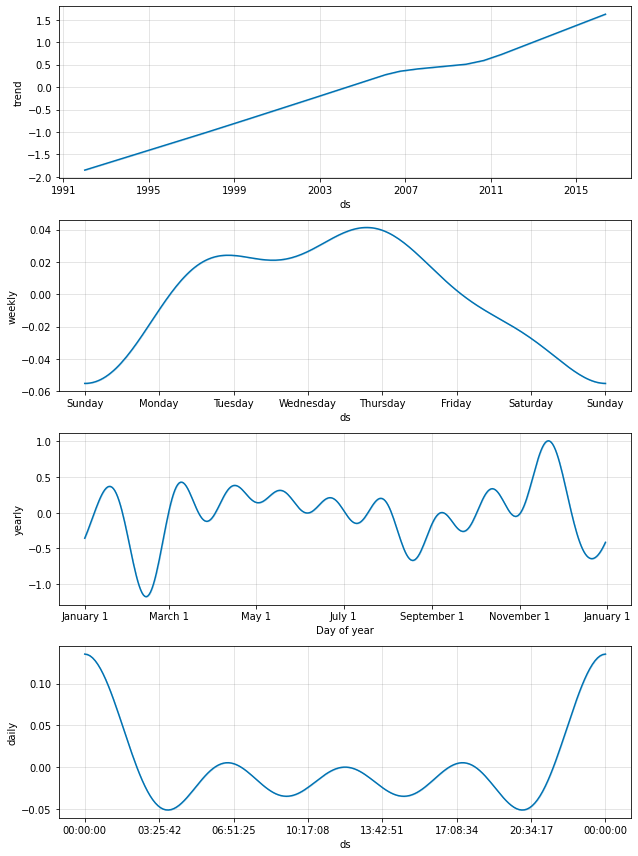

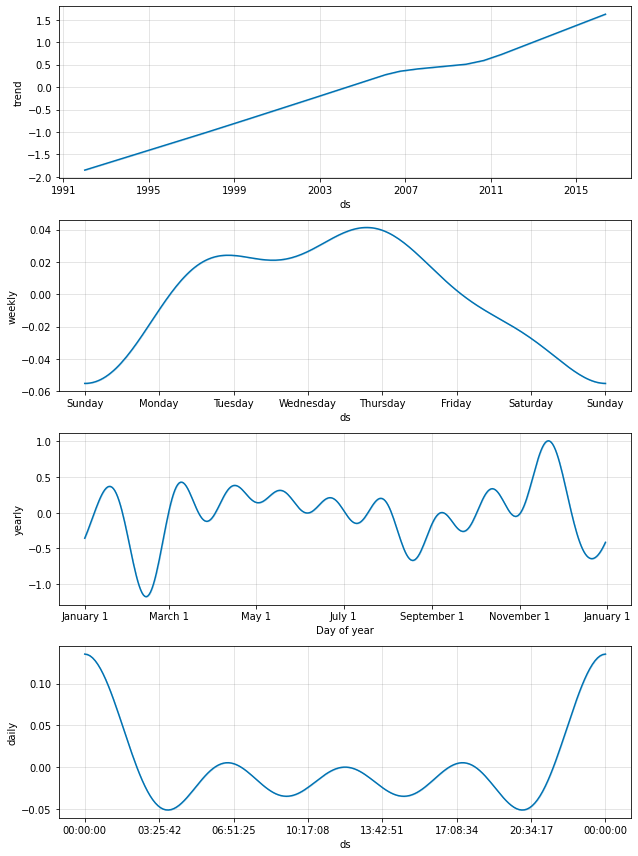

In [14]:
fframe.plot_components()

In [15]:
fframe.get_predictions()

,trend,predicted_y,predicted_y_upper,predicted_y_lower
ds,,,,
1992-01-01,-1.849942,129896.233434,-1.932796,-2.223442
1992-02-01,-1.837449,129898.842267,-1.938438,-2.222707
1992-03-01,-1.825761,163648.942243,-1.553695,-1.849116
1992-04-01,-1.813268,163554.651925,-1.539747,-1.826524
1992-05-01,-1.801177,178032.534186,-1.392513,-1.666107
...,...,...,...,...
2016-05-07,1.621890,473506.850135,2.063086,1.764104
2016-05-08,1.622395,472533.476253,2.044144,1.757828
2016-05-09,1.622900,477979.187883,2.107750,1.821331


In [16]:
fframe.get_errors()

,Actuals,Predictions,Absolute Percent Error,Absolute Error,Squared Error
count,293.000000,293.000000,293.000000,293.000000,2.930000e+02
mean,308971.310580,308969.036273,0.024865,7520.143111,9.616791e+07
std,86084.323897,85303.278296,0.020388,6304.841225,1.518397e+08
min,146376.000000,129896.233434,0.000034,13.441876,1.806840e+02
25%,234503.000000,236868.843170,0.009342,2767.943314,7.661510e+06
50%,314051.000000,320250.650936,0.019466,5714.836769,3.265936e+07
75%,375795.000000,372248.260432,0.034700,10635.748597,1.131191e+08
max,518253.000000,505556.932190,0.116809,31510.505384,9.929119e+08


In [17]:
fframe.cross_validate(folds=3)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [18]:
fframe.get_cross_validation_errors()[-1]

{'In-Sample':             Actuals    Predictions  Absolute Percent Error  Absolute Error  \
 count     220.00000     220.000000              220.000000      220.000000   
 mean   274645.62500  274635.619142                0.056252    15990.760192   
 std     68162.56250   63914.176960                0.050189    15916.746535   
 min    146376.00000  155763.387195                0.000215       58.166153   
 25%    217961.00000  218954.717088                0.016647     4242.848533   
 50%    277802.50000  275412.139336                0.039424    11023.100738   
 75%    329124.25000  331643.368719                0.085264    22222.172686   
 max    426077.03125  384175.965066                0.198355    77112.324869   
 
        Squared Error  
 count   2.200000e+02  
 mean    5.078957e+08  
 std     9.838956e+08  
 min     3.383301e+03  
 25%     1.800194e+07  
 50%     1.215265e+08  
 75%     4.938690e+08  
 max     5.946311e+09  ,
 'Out-of-Sample':              Actuals    Predictions  Ab